In [1]:
#-*- coding: utf-8 -*-
import os
import numpy as np

from yolo3.voc_eval import voc_eval   # 注意將voc_eval.py和compute_mAP.py放在同一級目錄下

detpath = 'Path to dets txt'   # 各類txt文件路徑
detfiles = os.listdir(detpath)

In [2]:
detfiles

['Main', 'test_xml', 'class', 'result', '測試檔案', 'name', 'img.png']

In [3]:
detfiles = os.listdir(detpath)
current_path = os.getcwd()
results_path = current_path+"/Path to dets txt/test_xml"
sub_files = os.listdir(results_path)

In [4]:
sub_files

['img20m.xml']

In [5]:
for i in range(len(sub_files)):
    class_name_xml = sub_files[i].split(".xml")[0]

In [6]:
class_name_xml

'img20m'

In [7]:
classes = ('__background__', # always index 0 數據集類別
                  class_name_xml)


aps = []      # 保存各類ap
recs = []     # 保存recall
precs = []    # 保存精度

annopath = 'Path to dets txt/test_xml/' + '{:s}.xml'    # annotations的路徑，{:s}.xml方便後面根據圖像名字讀取對應的xml文件
imagesetfile = 'Path to dets txt/Main/test.txt'  # 讀取圖像名字列表文件
cachedir = 'Path to annotations_cache/'

In [8]:
detfiles

['Main', 'test_xml', 'class', 'result', '測試檔案', 'name', 'img.png']

In [9]:
current_path = os.getcwd()
results_path = current_path+"/Path to dets txt/name"
sub_files = os.listdir(results_path)
for i in range(len(sub_files)):
    class_name = sub_files[i].split(".txt")[0]

In [10]:
sub_files

['方標.txt']

In [11]:
class_name

'方標'

In [12]:
import xml.etree.ElementTree as ET
import os
import pickle
import numpy as np

def parse_rec(filename):
    """ Parse a PASCAL VOC xml file """
    tree = ET.parse(filename)
    objects = []
    for obj in tree.findall('object'):
        obj_struct = {}
        obj_struct['name'] = obj.find('name').text
        obj_struct['pose'] = obj.find('pose').text
        obj_struct['truncated'] = int(obj.find('truncated').text)
        obj_struct['difficult'] = int(obj.find('difficult').text)
        bbox = obj.find('bndbox')
        obj_struct['bbox'] = [int(bbox.find('xmin').text),
                              int(bbox.find('ymin').text),
                              int(bbox.find('xmax').text),
                              int(bbox.find('ymax').text)]
        objects.append(obj_struct)

    return objects

def voc_ap(rec, prec, use_07_metric=False):
    """ ap = voc_ap(rec, prec, [use_07_metric])
    Compute VOC AP given precision and recall.
    If use_07_metric is true, uses the
    VOC 07 11 point method (default:False).
    """
    if use_07_metric:
        # 11 point metric
        ap = 0.
        for t in np.arange(0., 1.1, 0.1):
            if np.sum(rec >= t) == 0:
                p = 0
            else:
                p = np.max(prec[rec >= t])
            ap = ap + p / 11.
    else:
        # correct AP calculation
        # first append sentinel values at the end
        mrec = np.concatenate(([0.], rec, [1.]))
        mpre = np.concatenate(([0.], prec, [0.]))

        # compute the precision envelope
        for i in range(mpre.size - 1, 0, -1):
            mpre[i - 1] = np.maximum(mpre[i - 1], mpre[i])

        # to calculate area under PR curve, look for points
        # where X axis (recall) changes value
        i = np.where(mrec[1:] != mrec[:-1])[0]

        # and sum (\Delta recall) * prec
        ap = np.sum((mrec[i + 1] - mrec[i]) * mpre[i + 1])
    return ap

In [13]:
cachedir

'Path to annotations_cache/'

In [14]:
imagesetfile

'Path to dets txt/Main/test.txt'

In [15]:

# first load gt
# 取真实的标签
    # if cachedir不存在就创建一个
if not os.path.isdir(cachedir):
    os.mkdir(cachedir)
cachefile = os.path.join(cachedir, '_annots.pkl')

In [16]:
with open(imagesetfile, 'r',encoding="utf-8") as f:
        lines = f.readlines()  # 读取所有图片名
imagenames = [x.strip() for x in lines]  # x.strip()代表去除开头和结尾的'\n'或者'\t'

In [17]:
imagesetfile

'Path to dets txt/Main/test.txt'

In [18]:
imagenames

['img20m']

In [19]:
# 如果缓存路径对应的文件没有，则读取annotations
if not os.path.isfile(cachefile):
    # load annotations
     # 这是一个字典
    recs = {}
    for i, imagename in enumerate(imagenames):
        # parse_rec用于读取xml文件
        recs[imagename] = parse_rec(annopath.format(imagename))
        if i % 100 == 0:
            print('Reading annotation for {:d}/{:d}'.format(
                    i + 1, len(imagenames)))
        # save
    print('Saving cached annotations to {:s}'.format(cachefile))
    with open(cachefile, 'wb') as f:
        pickle.dump(recs, f)  # dump是序列化保存，load是序列化解析
else:  # 如果已经有了cachefile缓存文件，直接读取
    # load
    with open(cachefile, 'rb') as f:
        try:
            recs = pickle.load(f)
        except:
            recs = pickle.load(f, encoding='bytes')


Reading annotation for 1/1
Saving cached annotations to Path to annotations_cache/_annots.pkl


In [20]:
recs

{'img20m': [{'bbox': [2358, 1270, 2396, 1310],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [2403, 1270, 2443, 1311],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [2449, 1271, 2485, 1312],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [2491, 1272, 2530, 1312],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [2534, 1272, 2572, 1311],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [2576, 1270, 2616, 1312],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [2242, 1308, 2291, 1360],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [2299, 1312, 2343, 1361],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [2245, 1361, 2288, 1414],
 

In [21]:
class_recs = {}  # 当前类别的标注
npos = 0
classname=class_name
use_diff=False

In [22]:
recs

{'img20m': [{'bbox': [2358, 1270, 2396, 1310],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [2403, 1270, 2443, 1311],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [2449, 1271, 2485, 1312],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [2491, 1272, 2530, 1312],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [2534, 1272, 2572, 1311],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [2576, 1270, 2616, 1312],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [2242, 1308, 2291, 1360],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [2299, 1312, 2343, 1361],
   'difficult': 0,
   'name': '方標',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [2245, 1361, 2288, 1414],
 

In [23]:
classname

'方標'

In [24]:
imagenames

['img20m']

In [25]:
for imagename in imagenames:
    # recs[imagename]是保存了图片的object里面的所有属性，是个字典
    # 值保留指定类别的项
    R = [obj for obj in recs[imagename] if obj['name'] == classname]
    # 获得所有的bbox,里面保存了xmin,ymin,xmax,ymax
    bbox = np.array([x['bbox'] for x in R])
    if use_diff:  # 如果使用difficult(难检测的),所有的值都是false
        difficult = np.array([False for x in R]).astype(np.bool)
    else:  # 否则里面的内容有1有0
        difficult = np.array([x['difficult'] for x in R]).astype(np.bool)
        # len(R)就是当前类别的个数
        # 开辟一个全为False长度是len(R)的数组
        det = [False] * len(R)
        # 我测试~difficult的意思是取相反数之后再减1，这是什么意思。。。
        npos = npos + sum(~difficult)
        class_recs[imagename] = {'bbox': bbox,
                                 'difficult': difficult,
                                 'det': det}

In [26]:
npos

30

In [27]:
class_recs

{'img20m': {'bbox': array([[2358, 1270, 2396, 1310],
         [2403, 1270, 2443, 1311],
         [2449, 1271, 2485, 1312],
         [2491, 1272, 2530, 1312],
         [2534, 1272, 2572, 1311],
         [2576, 1270, 2616, 1312],
         [2242, 1308, 2291, 1360],
         [2299, 1312, 2343, 1361],
         [2245, 1361, 2288, 1414],
         [2296, 1366, 2346, 1414],
         [2243, 1419, 2291, 1471],
         [2297, 1424, 2346, 1472],
         [2244, 1476, 2289, 1520],
         [2300, 1477, 2344, 1521],
         [2246, 1526, 2290, 1571],
         [2298, 1525, 2344, 1571],
         [2248, 1578, 2291, 1622],
         [2298, 1579, 2344, 1619],
         [2353, 1578, 2387, 1613],
         [2357, 1622, 2386, 1651],
         [2393, 1577, 2426, 1615],
         [2393, 1621, 2427, 1650],
         [2430, 1579, 2468, 1615],
         [2433, 1621, 2467, 1651],
         [2470, 1580, 2505, 1614],
         [2471, 1619, 2503, 1651],
         [2508, 1580, 2545, 1615],
         [2507, 1618, 2542, 1650],
  

In [28]:
detpath1='Path to dets txt/class/{}'
classes = ('__background__', # always index 0 數據集類別
                  '方標')
current_path = os.getcwd()
results_path = current_path+"/Path to dets txt/class"
sub_files = os.listdir(results_path)
for i in range(len(sub_files)):
    class_name = sub_files[i].split(".txt")[0]
    class_name1 = sub_files[i]

In [29]:
class_name1

'img20m.txt'

In [30]:
detfile = detpath1.format(class_name1)

In [31]:
detfile

'Path to dets txt/class/img20m.txt'

In [32]:
with open(detfile, 'r') as f:
    lines = f.readlines()

In [33]:
splitlines = [x.strip().split(' ') for x in lines]
splitlines

[['img20m', '0.6191034', '2245', '1305', '2292', '1361'],
 ['img20m', '0.6212341', '2506', '1608', '2545', '1649'],
 ['img20m', '0.6225059', '2301', '1566', '2336', '1609'],
 ['img20m', '0.6441599', '2248', '1421', '2290', '1472'],
 ['img20m', '0.6579367', '2453', '1613', '2484', '1644'],
 ['img20m', '0.6845812', '2248', '1507', '2290', '1554'],
 ['img20m', '0.7096493', '2353', '1571', '2391', '1611'],
 ['img20m', '0.7322831', '2249', '1564', '2289', '1609']]

In [34]:
image_ids = [x[0] for x in splitlines]  # x[0]为名称
image_ids

['img20m',
 'img20m',
 'img20m',
 'img20m',
 'img20m',
 'img20m',
 'img20m',
 'img20m']

In [35]:
confidence = np.array([float(x[1]) for x in splitlines])  # x[1]为得分
confidence

array([0.6191034, 0.6212341, 0.6225059, 0.6441599, 0.6579367, 0.6845812,
       0.7096493, 0.7322831])

In [36]:
splitlines_list=[]

In [37]:
for x in splitlines:
    splitlines1=[i for i in x if(len(str(i))!=0)]
    print(splitlines1)
    splitlines_list.append(splitlines1)
splitlines_list

['img20m', '0.6191034', '2245', '1305', '2292', '1361']
['img20m', '0.6212341', '2506', '1608', '2545', '1649']
['img20m', '0.6225059', '2301', '1566', '2336', '1609']
['img20m', '0.6441599', '2248', '1421', '2290', '1472']
['img20m', '0.6579367', '2453', '1613', '2484', '1644']
['img20m', '0.6845812', '2248', '1507', '2290', '1554']
['img20m', '0.7096493', '2353', '1571', '2391', '1611']
['img20m', '0.7322831', '2249', '1564', '2289', '1609']


[['img20m', '0.6191034', '2245', '1305', '2292', '1361'],
 ['img20m', '0.6212341', '2506', '1608', '2545', '1649'],
 ['img20m', '0.6225059', '2301', '1566', '2336', '1609'],
 ['img20m', '0.6441599', '2248', '1421', '2290', '1472'],
 ['img20m', '0.6579367', '2453', '1613', '2484', '1644'],
 ['img20m', '0.6845812', '2248', '1507', '2290', '1554'],
 ['img20m', '0.7096493', '2353', '1571', '2391', '1611'],
 ['img20m', '0.7322831', '2249', '1564', '2289', '1609']]

In [38]:
BB = np.array([[float(z) for z in x[2:]] for x in splitlines_list])  # x[2]为bbox的4个值
BB

array([[2245., 1305., 2292., 1361.],
       [2506., 1608., 2545., 1649.],
       [2301., 1566., 2336., 1609.],
       [2248., 1421., 2290., 1472.],
       [2453., 1613., 2484., 1644.],
       [2248., 1507., 2290., 1554.],
       [2353., 1571., 2391., 1611.],
       [2249., 1564., 2289., 1609.]])

In [39]:
nd = len(image_ids)
nd 

8

In [40]:
tp = np.zeros(nd)
fp = np.zeros(nd)

In [41]:
ovthresh=0.5

In [42]:
if BB.shape[0] > 0:
    # sort by confidence
    # 按照分数从大到小排序，返回下标
    sorted_ind = np.argsort(-confidence)
    # 按照分数从大到小排序，返回分数
    # 下面也没有用到该变量，其实sorted_ind得到之后，直接根据confidence[sorted_ind[i]]就可以得到sorted_scores
    sorted_scores = np.sort(-confidence)
    # 对BB也重排一下
    #BB = BB[sorted_ind, :]
    BB = BB[sorted_ind]
    # image_ids也重排
    image_ids = [image_ids[x] for x in sorted_ind]
    # 上面这些操作就是为了下标对应起来，后面好操作
    # go down dets and mark TPs and FPs
    for d in range(nd):
        # 由image_ids[d]获取名称。然后得到R
        R = class_recs[image_ids[d]]
        # dets是检测结果的路径,BB通过dets获取每一行的数据，然后得到对应的BB值(也就是4个属性)
        #bb = BB[d, :].astype(float)
        bb = BB[d]
        # 设置一个负无穷
        ovmax = -np.inf
        # BBGT是真实的坐标
        BBGT = R['bbox'].astype(float)
        
        if BBGT.size > 0:
            ixmin = np.maximum(BBGT[:, 0], bb[0])
            iymin = np.maximum(BBGT[:, 1], bb[1])
            ixmax = np.minimum(BBGT[:, 2], bb[2])
            iymax = np.minimum(BBGT[:, 3], bb[3])
            iw = np.maximum(ixmax - ixmin + 1., 0.)
            ih = np.maximum(iymax - iymin + 1., 0.)
            # 计算重叠区域的面积
            inters = iw * ih
            
            # union
            # 并集面积就是两个区域的面积减去重叠区域的面积
            uni = ((bb[2] - bb[0] + 1.) * (bb[3] - bb[1] + 1.) +
                       (BBGT[:, 2] - BBGT[:, 0] + 1.) *
                       (BBGT[:, 3] - BBGT[:, 1] + 1.) - inters)
            # 计算IOU，注意这个overlaps不一定是一个数值，可能是一个列表的,所有后面才有np.max和np.argmax
            overlaps = inters / uni
            # 保留最大的IOU
            ovmax = np.max(overlaps)
            # 保留最大IOU的下标
            jmax = np.argmax(overlaps)
            
        if ovmax > ovthresh:  # 这个阙值默认0.5
            if not R['difficult'][jmax]:  # 这个后面是不是少个else，如果是难测样本呢？？
                # R = class_recs[image_ids[d]]
                if not R['det'][jmax]:  # R['det']初始值全为False,意思应该是如果该位置第一次使用，才可以。那也会出现tp[d]=fp[d]=1的情况啊
                    # 下面都是标记
                    tp[d] = 1.
                    R['det'][jmax] = 1
                else:
                    fp[d] = 1.
        else:
            fp[d] = 1.

In [43]:
use_07_metric=False
fp = np.cumsum(fp)
tp = np.cumsum(tp)
rec = tp / float(npos)
# avoid divide by zero in case the first detection matches a difficult
# ground truth
prec = tp / np.maximum(tp + fp, np.finfo(np.float64).eps)
ap = voc_ap(rec, prec, use_07_metric)

In [44]:
tp

array([1., 2., 2., 2., 3., 3., 4., 5.])

In [45]:
tp + fp, np.finfo(np.float64).eps

(array([1., 2., 3., 4., 5., 6., 7., 8.]), 2.220446049250313e-16)

In [46]:
rec, prec, ap

(array([0.03333333, 0.06666667, 0.06666667, 0.06666667, 0.1       ,
        0.1       , 0.13333333, 0.16666667]),
 array([1.        , 1.        , 0.66666667, 0.5       , 0.6       ,
        0.5       , 0.57142857, 0.625     ]),
 0.12916666666666665)

In [47]:
dfggg

NameError: name 'dfggg' is not defined

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
x=[0.03333333, 0.06666667, 0.06666667, 0.06666667, 0.1       ,
        0.1       , 0.13333333, 0.16666667 ]
y1=[1.        , 1.        , 0.66666667, 0.5       , 0.6       ,
        0.5       , 0.57142857, 0.625  ]

In [50]:
sum(x)/8

0.09166666750000001

In [51]:
sum(y1)/8

0.682886905

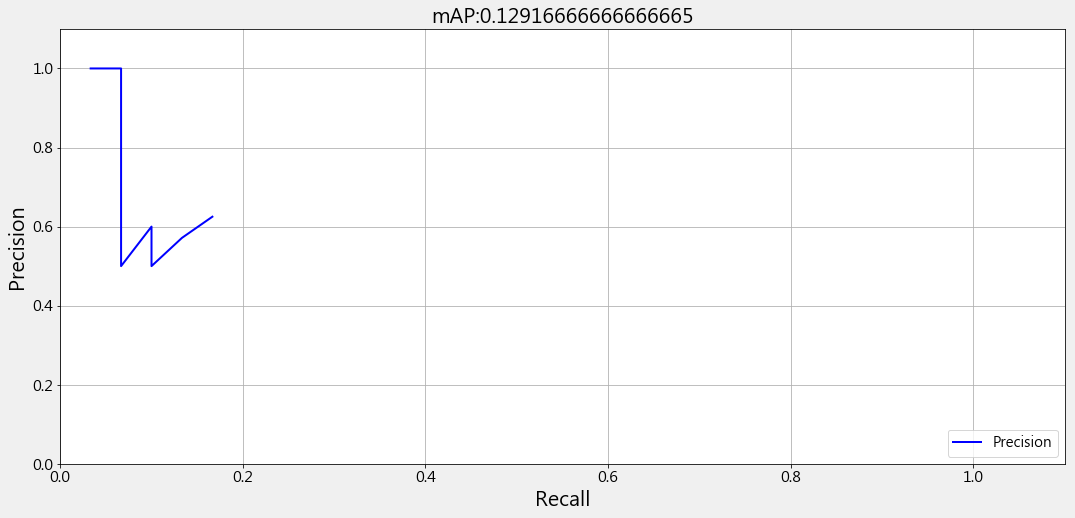

In [52]:
fig = plt.figure(figsize= (18,8) )
plt.plot(x,y1,lw=2,c='b',alpha=1,label='Precision')
plt.gcf().set_facecolor(np.ones(3)* 240 / 255)   # 生成画布的大小
plt.grid()  # 生成网格
plt.xlim(0,1.1)
plt.ylim(0,1.1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax = plt.gca()
ax.set_title('mAP:'+str(ap), fontsize='20')
plt.legend(fontsize = 14,loc='lower right')
plt.xlabel("Recall", fontsize='20')
plt.ylabel("Precision", fontsize='20')
plt.savefig("Path to dets txt/result/filename.png")
plt.show()

In [53]:
4/30

0.13333333333333333